Context manager objects exist to control a *__with__* statement, just like iterators exist to control a *__for__* statement.

The context manager interface consists of the **\__enter__** and **\__exit__** methods. At the top of the *__with__* python calls the **\__enter__** method of the context manager object.
When the *__with__* competes or terminates for any reason, Python calls **\__exit__** on the context manager object.

In [1]:
from mirror import LookingGlass

In [2]:
with LookingGlass() as what:
    print('Alice, Kitty and Snowdrop')
    print(what)
print('back to normal')

pordwonS dna yttiK ,ecilA
YKCOWREBBAJ
back to normal


In [3]:
import sys
sys.stdout.write('jallo43')

jallo43

7

In [4]:
with open('Shakespeare_data.csv')as fp:
    src = fp.read(60)
    
len(src)

60

In [5]:
fp

<_io.TextIOWrapper name='Shakespeare_data.csv' mode='r' encoding='cp1252'>

In [6]:
fp.closed, fp.encoding

(True, 'cp1252')

In [7]:
#fp.read(60)

In [8]:
manager = LookingGlass()
monster = manager.__enter__()
monster == 'JABBERWOCKY'
#this kind of mokey patch doesnt work for jupyter notebooks though

True

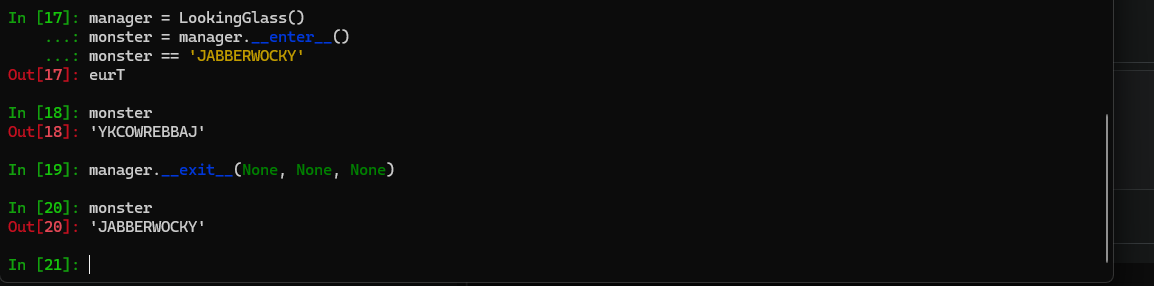

The *__contextmanager__* decorator lets you create a contextmanager as function without having to write your own class.
When the interpreter calls **\__enter__** code until yield is executed, **\__exit__** will run the rest of the code

Having a __*try/finally*__ (or a *__with__*) block around the *__yield__* is an unavoidable price of using *__@contextmanager__*, because you never know what the users of your context manager are going to do inside the with block

In [9]:
import sys
from contextlib import contextmanager

In [10]:
@contextmanager
def looking_glass_():
    original_write = sys.stdout.write #save the function to replace it later
    
    def reverse_write(text):
        original_write(text[::-1])
        
    sys.stdout.write = reverse_write
    msg = ''
    try:
        yield 'JABBERWOCKY'
    except ZeroDivisionError: 
        msg = 'Please DO NOT divide by zero!'
    finally:
        sys.stdout.write = original_write
        if msg:
            print(msg)

In [11]:
with looking_glass_() as what:
    print('Alice, Kitty and Snowdrop')
    print(what)
print('back to normal')

Alice, Kitty and Snowdrop
JABBERWOCKY
lamron ot kcab


In [12]:
#the contextmanager created with the @contextmanager decorator can also be use as a decorator itself
@looking_glass_()
def verse():
    print('The time has come')

In [13]:
verse()

The time has come


In [14]:
print('back to normal')

lamron ot kcab


------------------

In [15]:
from lis import parse, Environment, standard_env, lispstr

In [16]:
parse('1.5')

1.5

In [17]:
parse('(gcd 18 45)')

['gcd', 18, 45]

In [18]:
parse('(+ 2 2 (+ 3 3))')

['+', 2, 2, ['+', 3, 3]]

In [19]:
parse('(define double (lambda (n) (* n 2)))')

['define', 'double', ['lambda', ['n'], ['*', 'n', 2]]]

In [20]:
expr = parse('(lambda (a b) (* (/ a b) 100)))')
expr

['lambda', ['a', 'b'], ['*', ['/', 'a', 'b'], 100]]

In [21]:
lispstr(expr)

'(lambda (a b) (* (/ a b) 100))'

In [22]:
from collections import ChainMap

dict1 = {'a': 1, 'b': 2}
dict2 = {'b': 3, 'c': 4}

chain = ChainMap(dict1, dict2)
chain.maps[0]

{'a': 1, 'b': 2}

In [23]:
inner_env = {'a': 2}
outer_env = {'a': 0, 'b': 1}

env = Environment(inner_env, outer_env) #chainmap
env['a']

2

In [24]:
env['a'], env['c'] = 111, 222
env

Environment({'a': 111, 'c': 222}, {'a': 0, 'b': 1})

In [25]:
env.change('b', 333)
env

Environment({'a': 111, 'c': 222}, {'a': 0, 'b': 333})

In [26]:
#standard_env().maps[0]